In [1]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import Sequential  
from keras.layers import Dense, Activation, Conv2D  
from keras.layers import MaxPool2D, Flatten, Dropout, ZeroPadding2D, BatchNormalization  
from keras.utils import np_utils  
from keras.models import save_model, load_model  
from keras.models import Model
np.random.seed(10)

TensorFlow version: 1.11.0


Using TensorFlow backend.


In [2]:
train = pd.read_table('data_banknote_authentication.txt', header=None, sep=',')
print('dataset shape {}'.format(train.shape))
train.head()

dataset shape (1372, 5)


,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


shape of X (1372, 4); shape of y (1372,)


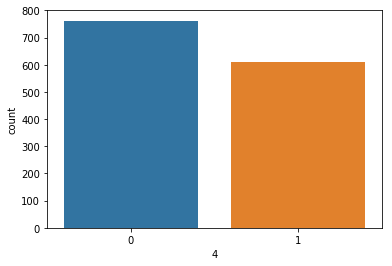

0    762
1    610
Name: 4, dtype: int64


In [3]:
X_train = train.iloc[:, 0:4]
y_train = train.iloc[:, 4]
print('shape of X {}; shape of y {}'.format(X_train.shape, y_train.shape))

# 绘制计数直方图
sns.countplot(y_train)
plt.show()
# 使用pd.Series.value_counts()
print(y_train.value_counts())

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [5]:
X_train_scaled[:5], y_train[:5]

(array([[ 0.53800777,  0.67928546, -0.78643462,  0.47325532],
        [ 0.67131803,  0.64196418, -0.75639175,  0.28865126],
        [ 0.57325718, -0.16670346, -0.3787839 ,  0.57390182],
        [ 0.5142101 ,  0.74339843, -0.89015874, -0.09912073],
        [ 0.06315615, -0.30267505, -0.15067525,  0.37472381]]), 0    0
 1    0
 2    0
 3    0
 4    0
 Name: 4, dtype: int64)

In [6]:
y_trainOneHot = np_utils.to_categorical(y_train)

In [7]:
y_trainOneHot[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [8]:
model = Sequential()

In [9]:
model.add(Dense(units=50, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='relu'))

In [10]:
model.add(Dense(units=2, kernel_initializer='normal', activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 2,234
Trainable params: 2,234
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


validation_split：0~1之间的浮点数，用来指定训练集的一定比例数据作为验证集。验证集将不参与训练，并在每个epoch结束后测试的模型的指标，如损失函数、精确度等。

注意，validation_split的划分在shuffle之前，因此如果你的数据本身是有序的，需要先手工打乱再指定validation_split，否则可能会出现验证集样本不均匀。 

In [13]:
train_history = model.fit(x=X_train_scaled, y=y_trainOneHot, validation_split=0.5,
                          epochs=50, batch_size=10, verbose=2)

Train on 686 samples, validate on 686 samples
Epoch 1/50
1s - loss: 0.5476 - acc: 1.0000 - val_loss: 1.3318 - val_acc: 0.1108
Epoch 2/50
0s - loss: 0.0307 - acc: 1.0000 - val_loss: 3.8819 - val_acc: 0.1108
Epoch 3/50
0s - loss: 0.0027 - acc: 1.0000 - val_loss: 4.6716 - val_acc: 0.1108
Epoch 4/50
0s - loss: 0.0012 - acc: 1.0000 - val_loss: 5.2193 - val_acc: 0.1108
Epoch 5/50
0s - loss: 7.2826e-04 - acc: 1.0000 - val_loss: 5.6701 - val_acc: 0.1108
Epoch 6/50
0s - loss: 4.7651e-04 - acc: 1.0000 - val_loss: 6.0435 - val_acc: 0.1108
Epoch 7/50
0s - loss: 3.3359e-04 - acc: 1.0000 - val_loss: 6.3375 - val_acc: 0.1108
Epoch 8/50
0s - loss: 2.4710e-04 - acc: 1.0000 - val_loss: 6.6130 - val_acc: 0.1108
Epoch 9/50
0s - loss: 1.8885e-04 - acc: 1.0000 - val_loss: 6.8523 - val_acc: 0.1108
Epoch 10/50
0s - loss: 1.4942e-04 - acc: 1.0000 - val_loss: 7.0785 - val_acc: 0.1108
Epoch 11/50
0s - loss: 1.2069e-04 - acc: 1.0000 - val_loss: 7.2814 - val_acc: 0.1108
Epoch 12/50
0s - loss: 9.8613e-05 - acc: 1.0

In [14]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

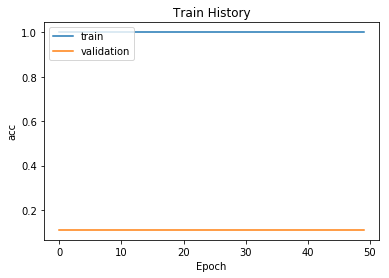

In [15]:
show_train_history(train_history, 'acc', 'val_acc')

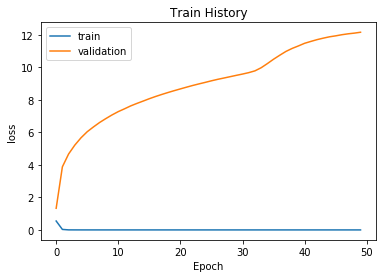

In [16]:
show_train_history(train_history, 'loss', 'val_loss')

In [17]:
scores = model.evaluate(X_train_scaled, y_trainOneHot)
print()
print('accuracy=',scores[1])

 768/1372 [===============>..............] - ETA: 0s
accuracy= 0.5553935860058309
